In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
import os, certifi
os.environ["SSL_CERT_FILE"] = certifi.where()

In [16]:
mnist = tf.keras.datasets.mnist

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
np.set_printoptions(linewidth=360)
index = 3
print(f"Index Label: {train_labels[index]}")
print(f"\n Image pixel array: \n\n {train_images[index]}")

Index Label: 1

 Image pixel array: 

 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127 251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0

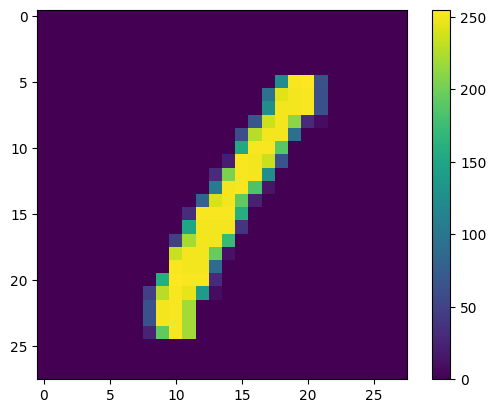

In [20]:
plt.imshow(train_images[index])
plt.colorbar()

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.Input((28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 28, activation = "relu"),
    tf.keras.layers.Dense(units = 10, activation = "softmax")
])

In [22]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss = "sparse_categorical_crossentropy",
    metrics = ["sparse_categorical_accuracy"]
)

In [23]:
class callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs ={}):
        if(logs.get("sparse_categorical_accuracy") > .9):
            self.model.stop_training = True

callbacks = callback()

In [25]:
train_images = train_images / 255
test_images = test_images / 255

In [26]:
model.fit(train_images, train_labels, epochs = 5, callbacks = [callbacks])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 613us/step - loss: 0.3831 - sparse_categorical_accuracy: 0.8929
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - loss: 0.2125 - sparse_categorical_accuracy: 0.9398


In [27]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.1965 - sparse_categorical_accuracy: 0.9414


[0.19645816087722778, 0.9413999915122986]

In [28]:
prediction = model.predict(test_images[:1,:,:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [29]:
prediction

array([[3.3290093e-05, 3.1997843e-08, 2.0941616e-04, 2.1026055e-03,
        1.3292785e-07, 4.5657562e-05, 5.7555699e-10, 9.9665773e-01,
        4.5273267e-05, 9.0583164e-04]], dtype=float32)

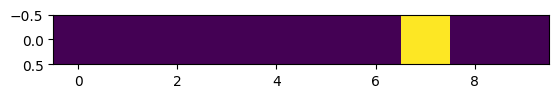

In [30]:
plt.imshow(prediction)

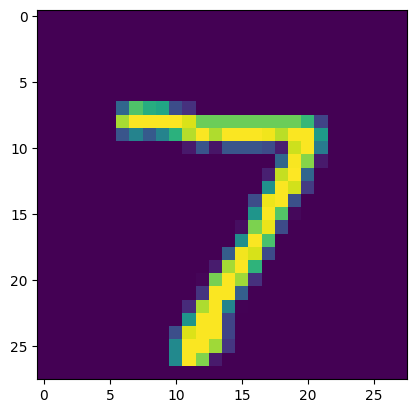

In [31]:
plt.imshow(test_images[0])